In [1]:
import pandas as pd
import numpy as np
from sklearn. ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from mlxtend.preprocessing import TransactionEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score,fbeta_score
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Train_Dataset.csv')

<ipython-input-3-e29449f02e57>:1: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Train_Dataset.csv')


In [4]:
df.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [5]:
df.isnull().sum()

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating          

In [6]:
df.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [7]:
df.columns

Index(['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days',
       'Employed_Days', 'Registration_Days', 'ID_Days', 'Own_House_Age',
       'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_1', 'Score_Source_2',
       'Score_Source_3', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Default'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

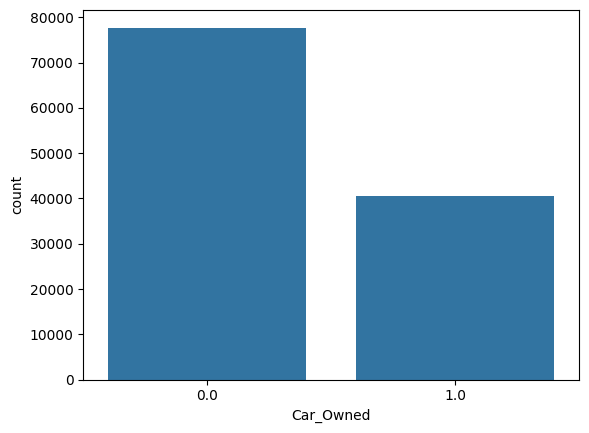

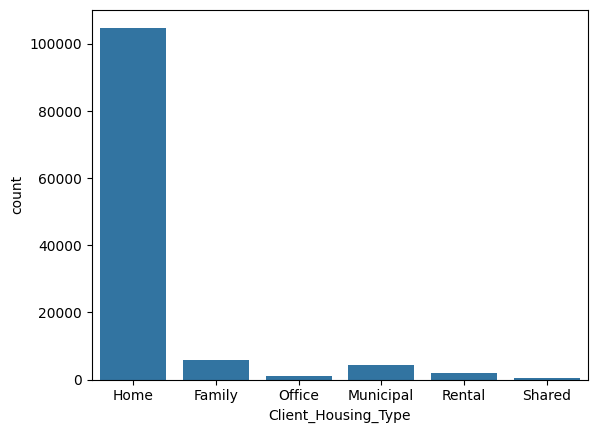

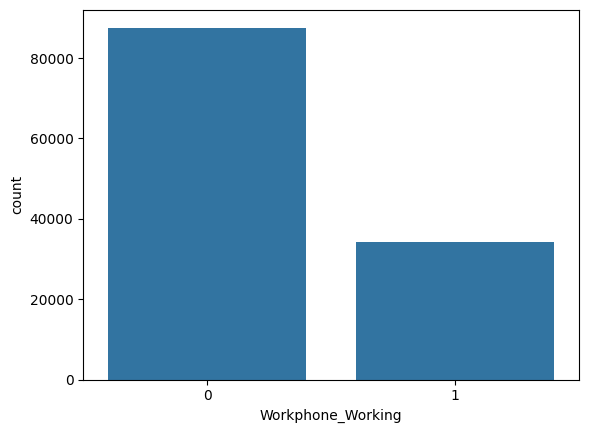

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for categorical variable
sns.countplot(x='Car_Owned', data=df)
plt.show()

sns.countplot(x='Client_Housing_Type', data=df)
plt.show()

sns.countplot(x='Workphone_Working', data=df)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

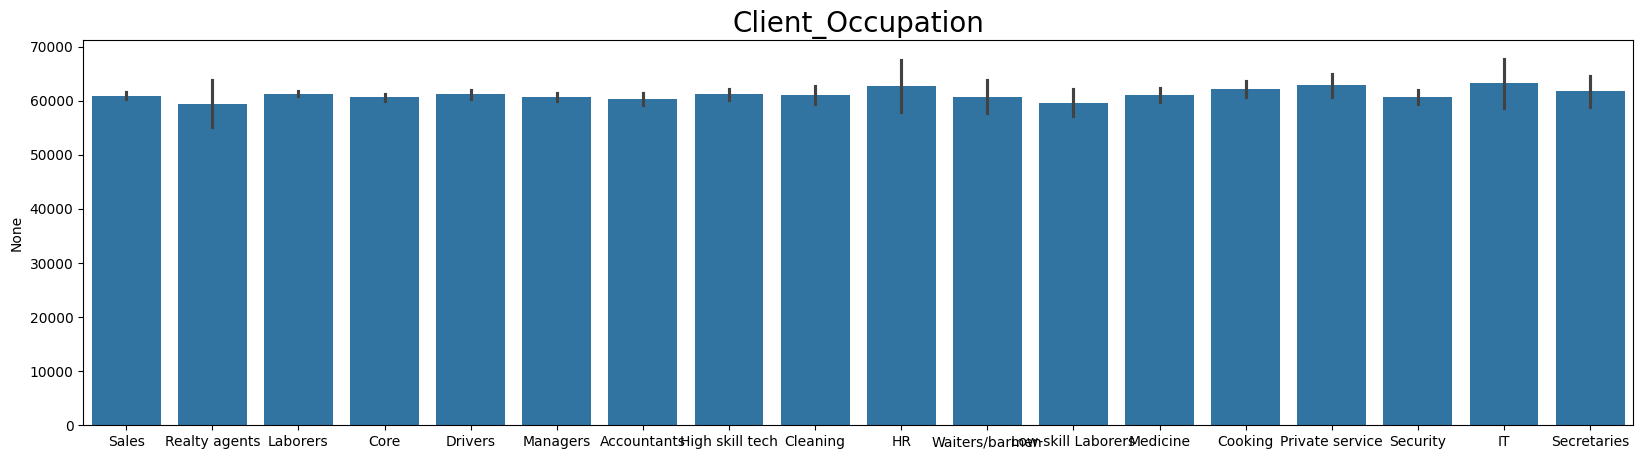

In [10]:
occ_count = df['Client_Occupation']
plt.figure(figsize=(20,5))
sns.barplot(x=occ_count.values, y=occ_count.index, alpha=1.0)
plt.title('Client_Occupation',fontsize=20)
plt.show

(-1.0, 4.0)

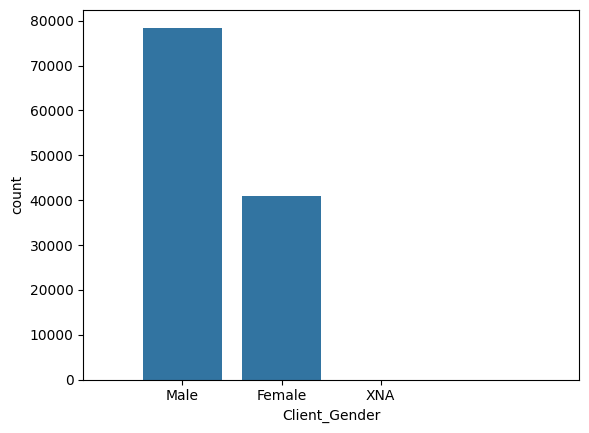

In [11]:
sns.countplot(x = "Client_Gender", data = df)
plt.xlim(-1,4)

In [12]:
df.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [13]:
columns_to_clean = ['Client_Income', 'Credit_Amount', 'Loan_Annuity']

# 1. Remove '$' symbol and handle empty strings
for col in columns_to_clean:
    # Remove '$' symbol and coerce empty strings to NaN
    df[col] = pd.to_numeric(df[col].replace({'\$': '', '': np.nan}), errors='coerce')

In [14]:
# Fill missing values with mode for categorical columns and median for numerical columns
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)

In [15]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    df[col] = df[col].astype(str)

# Apply LabelEncoder to categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [16]:
df.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,1,...,1,1,42,0.568066,0.478787,652,0.0186,63.0,1.0,0
1,12138936,20250.0,1.0,0.0,1.0,1.0,0.0,15282.00,1826.55,1,...,1,1,11,0.563360,0.215068,652,0.0887,755.0,1.0,0
2,12181264,18000.0,0.0,0.0,1.0,0.0,1.0,59527.35,2788.20,1,...,1,1,42,0.504657,0.552795,404,0.0742,277.0,0.0,0
3,12188929,15750.0,0.0,0.0,1.0,1.0,0.0,53870.40,2295.45,1,...,1,1,57,0.504657,0.135182,577,0.0887,1700.0,3.0,0
4,12133385,33750.0,1.0,0.0,1.0,0.0,2.0,133988.40,3547.35,1,...,1,1,5,0.508199,0.301182,420,0.2021,674.0,1.0,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               121856 non-null  float64
 2   Car_Owned                   121856 non-null  float64
 3   Bike_Owned                  121856 non-null  float64
 4   Active_Loan                 121856 non-null  float64
 5   House_Own                   121856 non-null  float64
 6   Child_Count                 121856 non-null  float64
 7   Credit_Amount               121856 non-null  float64
 8   Loan_Annuity                121856 non-null  float64
 9   Accompany_Client            121856 non-null  int64  
 10  Client_Income_Type          121856 non-null  int64  
 11  Client_Education            121856 non-null  int64  
 12  Client_Marital_Status       121856 non-null  int64  
 13  Client_Gender 

In [18]:
df.isnull().sum()

ID                            0
Client_Income                 0
Car_Owned                     0
Bike_Owned                    0
Active_Loan                   0
House_Own                     0
Child_Count                   0
Credit_Amount                 0
Loan_Annuity                  0
Accompany_Client              0
Client_Income_Type            0
Client_Education              0
Client_Marital_Status         0
Client_Gender                 0
Loan_Contract_Type            0
Client_Housing_Type           0
Population_Region_Relative    0
Age_Days                      0
Employed_Days                 0
Registration_Days             0
ID_Days                       0
Own_House_Age                 0
Mobile_Tag                    0
Homephone_Tag                 0
Workphone_Working             0
Client_Occupation             0
Client_Family_Members         0
Cleint_City_Rating            0
Application_Process_Day       0
Application_Process_Hour      0
Client_Permanent_Match_Tag    0
Client_C

In [19]:
# Separate features and target variable
X = df.drop('Default', axis=1)
y = df['Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=37)

Training The Model In Multiple Algorithms

In [20]:
# Decision tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision tree")

print("accuracy of training set: %f" % dt_model.score(X_train,y_train))
print("accuracy of testing set: %f" % dt_model.score(X_test,y_test))

Decision tree
accuracy of training set: 1.000000
accuracy of testing set: 0.866299


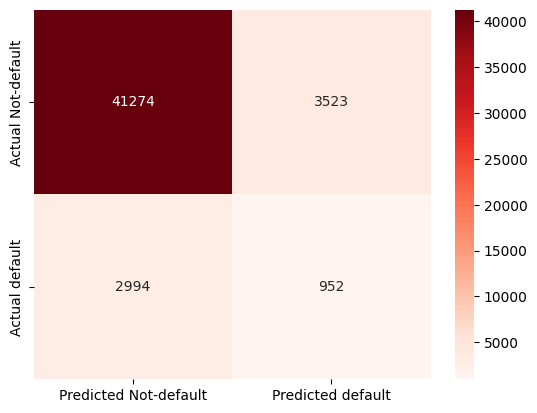

In [21]:
conf_mat = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_mat, annot=True, cmap='Reds', fmt='d',
            xticklabels=['Predicted Not-default', 'Predicted default'],
            yticklabels=['Actual Not-default', 'Actual default'])

plt.show()

In [22]:
# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classifier")

print("accuracy of training set: %f" % rf_model.score(X_train,y_train))
print("accuracy of testing set: %f" % rf_model.score(X_test,y_test))

Random Forest Classifier
accuracy of training set: 0.999959
accuracy of testing set: 0.925138


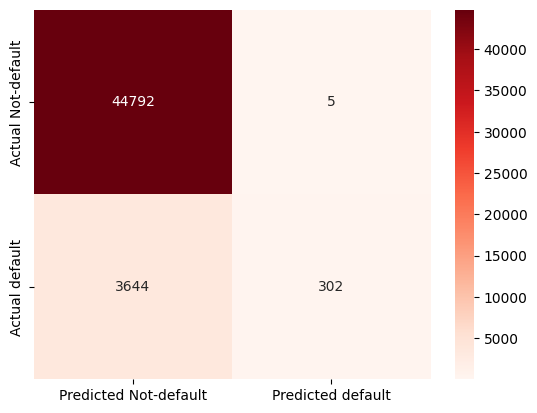

In [23]:
conf_mat = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_mat, annot=True, cmap='Reds', fmt='d',
            xticklabels=['Predicted Not-default', 'Predicted default'],
            yticklabels=['Actual Not-default', 'Actual default'])

plt.show()

In [24]:
# KNN Model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("K-Nearest Neighbors Classifier")

print("accuracy of training set: %f" % knn_model.score(X_train,y_train))
print("accuracy of testing set: %f" % knn_model.score(X_test,y_test))

K-Nearest Neighbors Classifier
accuracy of training set: 0.920643
accuracy of testing set: 0.914819


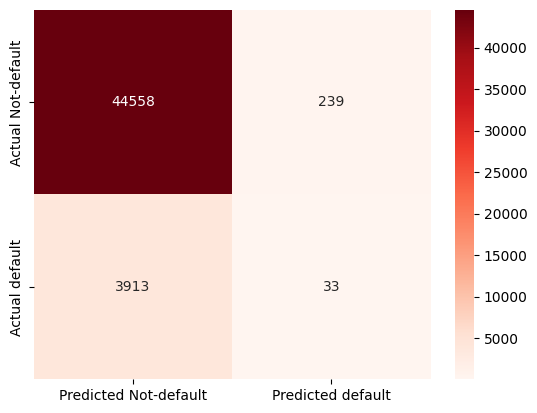

In [25]:
conf_mat = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_mat, annot=True, cmap='Reds', fmt='d',
            xticklabels=['Predicted Not-default', 'Predicted default'],
            yticklabels=['Actual Not-default', 'Actual default'])

plt.show()

In [26]:
#using naive
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()
naive_model.fit(X_train, y_train)
y_pred_naive = naive_model.predict(X_test)
print("Naive Bayes Classifier")

print("accuracy of training set: %f" % naive_model.score(X_train,y_train))
print("accuracy of testing set: %f" % naive_model.score(X_test,y_test))

Naive Bayes Classifier
accuracy of training set: 0.904791
accuracy of testing set: 0.904150


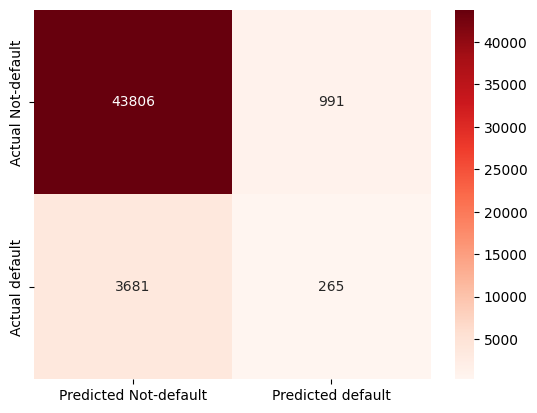

In [27]:
conf_mat = confusion_matrix(y_test, y_pred_naive)
sns.heatmap(conf_mat, annot=True, cmap='Reds', fmt='d',
            xticklabels=['Predicted Not-default', 'Predicted default'],
            yticklabels=['Actual Not-default', 'Actual default'])

plt.show()

In [28]:
# ANN Model
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
# Build the ANN Model
model = Sequential()
input_shape = X_train.shape[1]
input_shape

39

In [30]:
model.add(Dense(units=10, activation='relu', input_dim=(input_shape)))

model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))

# Add output layer
model.add(Dense(units=1, activation='sigmoid'))

# Comile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Fitting the ANN to the Traning set
model.fit(X_train, y_train, batch_size = 100, epochs = 10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


732/732 [==============================] - 7s 5ms/step - loss: 0.0000e+00 - accuracy: 0.9193
Epoch 2/10
732/732 [==============================] - 3s 4ms/step - loss: 0.0000e+00 - accuracy: 0.9193
Epoch 3/10
732/732 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.9193
Epoch 4/10
732/732 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.9193
Epoch 5/10
732/732 [==============================] - 4s 5ms/step - loss: nan - accuracy: 0.9193
Epoch 6/10
732/732 [==============================] - 4s 5ms/step - loss: nan - accuracy: 0.9193
Epoch 7/10
732/732 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.9193
Epoch 8/10
732/732 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.9193
Epoch 9/10
732/732 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.9193
Epoch 10/10
732/732 [==============================] - 4s 5ms/step - loss: nan - accuracy: 0.9193


In [31]:
import pickle

# Save the Model
filename = 'random_forest_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(rf_model, file)
print(f"Model saved as {filename}")

Model saved as random_forest_model.pkl
